In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt           
%matplotlib inline     
sns.set(color_codes=True)

In [2]:

df = pd.read_csv('heart_failure_clinical_records.csv')
df.dtypes
# age: age of the patient (years)
# anaemia: decrease of red blood cells or hemoglobin (boolean)
# high blood pressure: if the patient has hypertension (boolean)
# creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
# diabetes: if the patient has diabetes (boolean)
# ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
# platelets: platelets in the blood (kiloplatelets/mL)
# sex: woman or man (binary)
# serum creatinine: level of serum creatinine in the blood (mg/dL)
# serum sodium: level of serum sodium in the blood (mEq/L)
# smoking: if the patient smokes or not (boolean)
# time: follow-up period (days)
# [target] death event: if the patient deceased during the follow-up period (boolean)'''


age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

<AxesSubplot:xlabel='serum_sodium'>

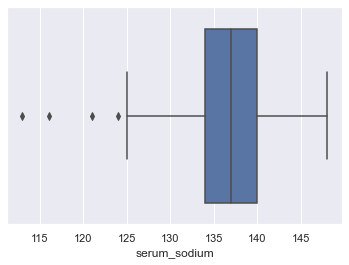

In [3]:
sns.boxplot(x=df['serum_sodium'])

<AxesSubplot:xlabel='ejection_fraction'>

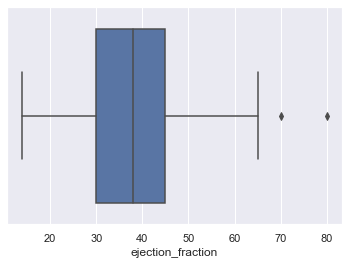

In [4]:
sns.boxplot(x=df['ejection_fraction'])

In [5]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                            19.0
anaemia                         1.0
creatinine_phosphokinase      465.5
diabetes                        1.0
ejection_fraction              15.0
high_blood_pressure             1.0
platelets                   91000.0
serum_creatinine                0.5
serum_sodium                    6.0
sex                             1.0
smoking                         1.0
time                          130.0
DEATH_EVENT                     1.0
dtype: float64


In [6]:
#removing outliers
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(224, 13)

<AxesSubplot:>

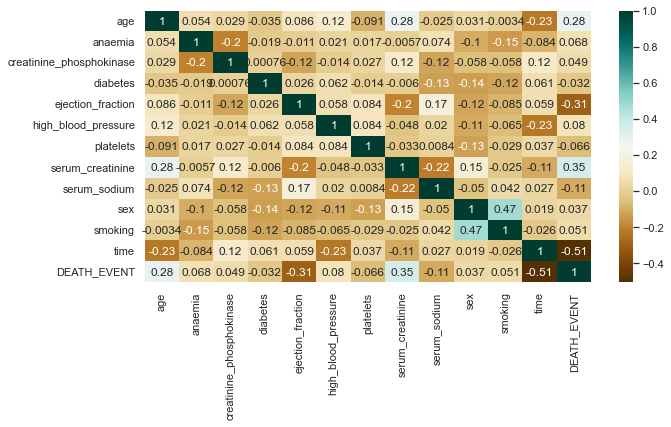

In [7]:
#Creating a heatmap to determine the correlation between each value
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

In [8]:
boolean = ['anaemia','high_blood_pressure','diabetes','sex','smoking','DEATH_EVENT']

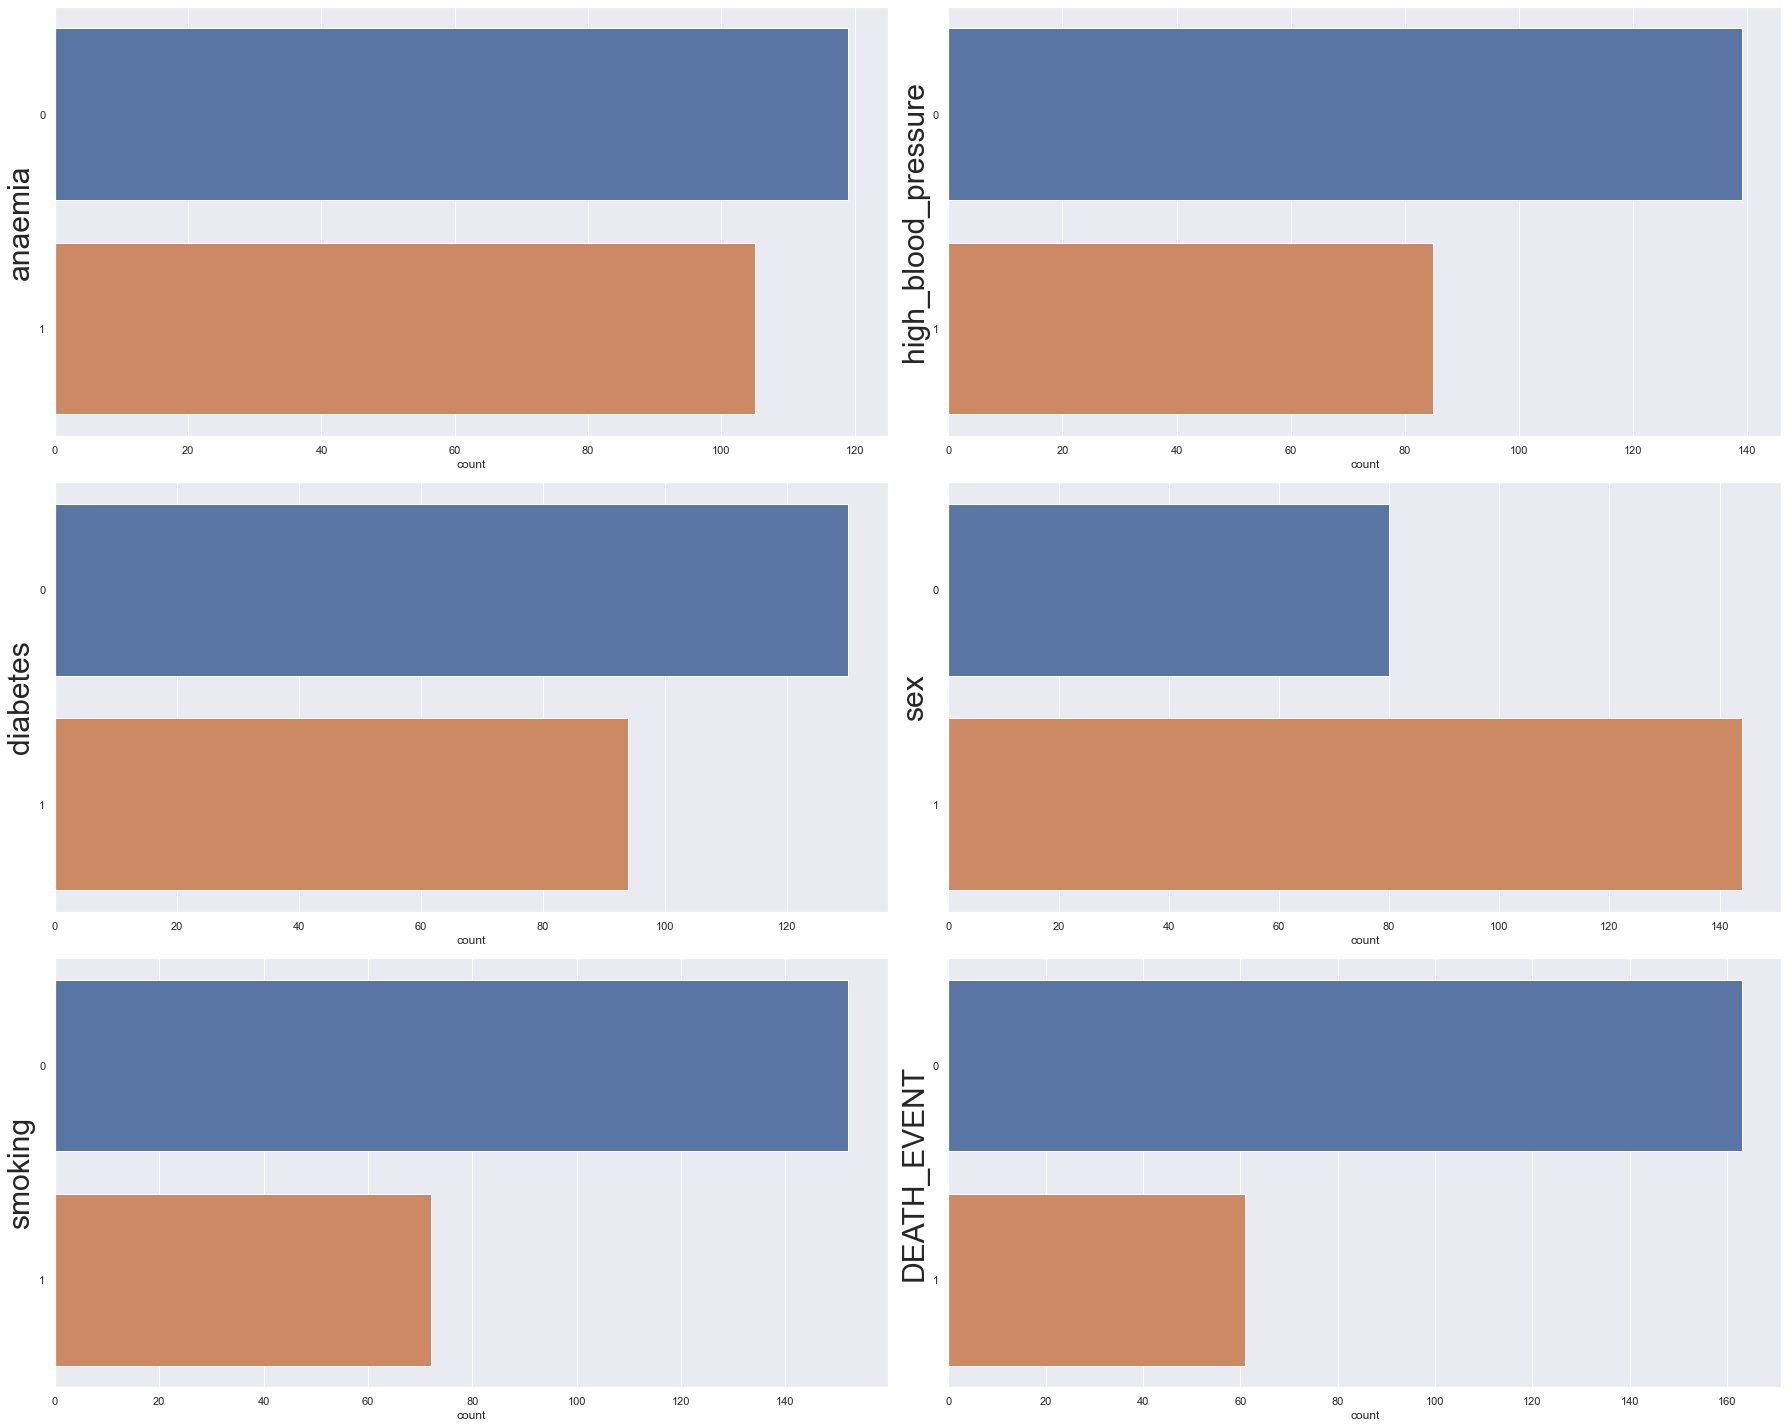

In [9]:
fig, ax = plt.subplots(3, 2, figsize=(25, 20))
for variable, subplot in zip(boolean, ax.flatten()):
    countplot = sns.countplot(y=df[variable], ax=subplot )
    countplot.set_ylabel(variable, fontsize = 30)  
plt.tight_layout()   
plt.show()

In [10]:
#Dataframe with patients who had diabetes
df_diabetes = df[df['diabetes'] == 1]
df_diabetes

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
21,65.0,1,128,1,30,1,297000.00,1.60,136,0,0,20,1
23,53.0,0,63,1,60,0,368000.00,0.80,135,1,0,22,0
24,75.0,0,582,1,30,1,263358.03,1.83,134,0,0,23,1
25,80.0,0,148,1,38,0,149000.00,1.90,144,1,1,23,1
27,70.0,0,122,1,45,1,284000.00,1.30,136,1,1,26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,65.0,0,892,1,35,0,263358.03,1.10,142,0,0,256,0
290,45.0,0,615,1,55,0,222000.00,0.80,141,0,0,257,0
292,52.0,0,190,1,38,0,382000.00,1.00,140,1,1,258,0
293,63.0,1,103,1,35,0,179000.00,0.90,136,1,1,270,0


Text(0, 0.5, 'Cases')

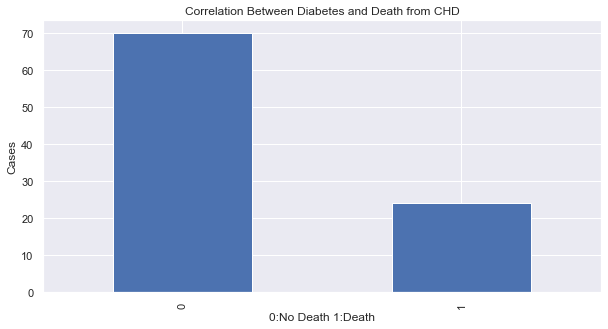

In [11]:
df_diabetes.DEATH_EVENT.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Correlation Between Diabetes and Death from CHD")
plt.xlabel("0:No Death 1:Death")
plt.ylabel("Cases")